In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def calculate_overall_rmse(df):
    """
    Calculate the overall RMSE across x, y, z, and yaw compared to their reference values.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing the actual values and reference values.
    
    Returns:
    float: The overall RMSE across all dimensions.
    """
    
    # Extract actual and reference values as numpy arrays
    actual_values = df[['x', 'y', 'z', 'yaw']].to_numpy()
    reference_values = df[['x_ref', 'y_ref', 'z_ref', 'yaw_ref']].to_numpy()
    
    # Compute the squared differences
    squared_errors = (actual_values - reference_values) ** 2
    
    # Compute the mean of the sum of squared differences across all dimensions
    mse = np.mean(np.sum(squared_errors, axis=1))
    
    # Return the square root of the mean squared error (overall RMSE)
    overall_rmse = np.sqrt(mse)
    
    return overall_rmse

In [3]:
log_file_path = 'mpclog1.log'
# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})

# Display the first few rows to confirm successful import
df_log.head()

,time,x,y,z,yaw,throttle,roll_rate,pitch_rate,yaw_rate,x_ref,y_ref,z_ref,yaw_ref,mpc_time,metadata
0,0.000001,0.200314,0.036242,0.070406,-0.003297,-0.975092,-0.366852,-0.8,0.8,0.800000,4.768372e-07,-1.25,0.0,0.006646,Sim
1,0.009514,0.200547,0.036122,0.070730,-0.003302,-0.975092,-0.356152,-0.8,0.8,0.799991,3.805623e-03,-1.25,0.0,0.002481,Horizon:3.0
2,0.019646,0.200783,0.035997,0.071065,-0.003310,-0.975092,-0.344884,-0.8,0.8,0.799961,7.858341e-03,-1.25,0.0,0.001482,Num Steps:20
3,0.029487,0.200908,0.036147,0.071069,-0.003306,-0.975092,-0.335088,-0.8,0.8,0.799913,1.179443e-02,-1.25,0.0,0.001680,No Pyjoules
4,0.039464,0.200803,0.036413,0.070756,-0.003292,-0.975092,-0.322325,-0.8,0.8,0.799844,1.578438e-02,-1.25,0.0,0.001622,0


In [4]:
print(f"This data comes from: {df_log['metadata'][0]}")
print(f"Predictor was: {df_log['metadata'][1]}")
print(f"(Valid for Nonlin predictor only) Predictor was: {df_log['metadata'][2]}")
print(f"For yaw error we used: {df_log['metadata'][3]}")
print(f"RMSE: {calculate_overall_rmse(df_log)}")


This data comes from: Sim
Predictor was: Horizon:3.0
(Valid for Nonlin predictor only) Predictor was: Num Steps:20
For yaw error we used: No Pyjoules
RMSE: 0.45756973351343067


In [5]:
def plot_adjusted_avg_and_max_xyz_vs_reference(df):
    fig, axs = plt.subplots(4, 4, figsize=(20, 12), sharex=False)
    time_max = df['time'].max()
    time_min = df['time'].min()
    x_lim = (time_min-1, time_max+1)
    
    # # Maximum values
    # max_fx = 0.035
    # max_fy = 0.035
    # max_fz = 0.2
    # max_tz = 0.001

    # # Calculate average values
    # avg_fx = df['fx'].mean()
    # avg_fy = df['fy'].mean()
    # avg_fz = df['fz'].mean()
    # avg_tz = df['tauz'].mean()

    # # Add some margin to cover both average and max values
    # margin_fx = max(max_fx, abs(avg_fx)) * 1.2
    # margin_fy = max(max_fy, abs(avg_fy)) * 1.2
    # margin_fz = max(max_fz, abs(avg_fz)) * 1.2
    # margin_tz = max(max_tz, abs(avg_tz)) * 1.2

    # Row 1: Plot x, y, z, psi vs references
    # plot x vs x_ref
    axs[0, 0].plot(df['time'], df['x'], label='x', color='red')
    axs[0, 0].plot(df['time'], df['x_ref'], label='x_ref', color='blue', linestyle='--')
    axs[0, 0].set_ylabel('x / x_ref')
    axs[0, 0].set_xlabel('time')
    axs[0, 0].legend()
    axs[0, 0].set_xlim(x_lim)

    # plot y vs y_ref
    axs[0, 1].plot(df['time'], df['y'], label='y', color='red')
    axs[0, 1].plot(df['time'], df['y_ref'], label='y_ref', color='blue', linestyle='--')
    axs[0, 1].set_ylabel('y / y_ref')
    axs[0, 1].set_xlabel('time')
    axs[0, 1].legend()
    axs[0, 1].set_xlim(x_lim)

    # plot z vs z_ref
    axs[0, 2].plot(df['time'], -1*df['z'], label='z', color='red')
    axs[0, 2].plot(df['time'], -1*df['z_ref'], label='z_ref', color='blue', linestyle='--')
    axs[0, 2].set_ylabel('z / z_ref')
    axs[0, 2].set_xlabel('time')
    axs[0, 2].legend()
    axs[0, 2].set_xlim(x_lim)
    axs[0, 2].set_ylim(0,-1*df['z'].min()+.1)


    # plot psi vs psi_ref
    axs[0, 3].plot(df['time'], df['yaw'], label='psi', color='red')
    axs[0, 3].plot(df['time'], df['yaw_ref'], label='psi_ref', color='blue', linestyle='--')
    axs[0, 3].set_ylabel('psi / psi_ref')
    axs[0, 3].set_xlabel('time')
    axs[0, 3].legend()
    axs[0, 3].set_xlim(x_lim)

    # Row 2: Plot cross comparisons (x vs y, x vs z, y vs z, time vs solve_time)
    # plot x vs y and x_ref vs y_ref
    axs[1, 0].plot(df['x'], df['y'], label='x vs y', color='red')
    axs[1, 0].plot(df['x_ref'], df['y_ref'], label='x_ref vs y_ref', color='blue', linestyle='--')
    axs[1, 0].set_ylabel('y')
    axs[1, 0].set_xlabel('x')
    axs[1, 0].legend()

    # plot x vs z and x_ref vs z_ref
    axs[1, 1].plot(df['x'], -1*df['z'], label='x vs z', color='red')
    axs[1, 1].plot(df['x_ref'], -1*df['z_ref'], label='x_ref vs z_ref', color='blue', linestyle='--')
    axs[1, 1].set_ylabel('z')
    axs[1, 1].set_xlabel('x')
    axs[1, 1].set_ylim(0,-1*df['z'].min()+.1)

    axs[1, 1].legend()

    # plot y vs z and y_ref vs z_ref
    axs[1, 2].plot(df['y'], -1*df['z'], label='y vs z', color='red')
    axs[1, 2].plot(df['y_ref'], -1*df['z_ref'], label='y_ref vs z_ref', color='blue', linestyle='--')
    axs[1, 2].set_ylabel('z')
    axs[1, 2].set_xlabel('y')
    axs[1, 2].set_ylim(0,-1*df['z'].min()+.1)

    axs[1, 2].legend()

    # # plot time vs solve_time
    # axs[1, 3].plot(df['time'], df['nr_time']* 1e-9, label='solve_time', color='purple')
    # axs[1, 3].set_ylabel('solve_time')
    # axs[1, 3].set_xlabel('time')
    # axs[1, 3].legend()
    # axs[1, 3].set_xlim(x_lim)

    # Row 3: Plot fx, fy, fz, tauz vs time
    # plot throttle vs time
    axs[2, 0].plot(df['time'], -1*df['throttle'], label='throttle', color='blue')
    # axs[2, 0].axhline(y=max_fx, color='red', linestyle='--', label=f'+{max_fx}')
    # axs[2, 0].axhline(y=-max_fx, color='red', linestyle='--', label=f'-{max_fx}')
    axs[2, 0].set_ylabel('throttle')
    axs[2, 0].set_xlabel('time')
    axs[2, 0].legend()
    # axs[2, 0].set_ylim((-margin_fx, margin_fx))
    axs[2, 0].set_xlim(x_lim)

    # plot roll_rate vs time
    axs[2, 1].plot(df['time'], df['roll_rate'], label='roll_rate', color='orange')
    # axs[2, 1].axhline(y=max_fy, color='red', linestyle='--', label=f'+{max_fy}')
    # axs[2, 1].axhline(y=-max_fy, color='red', linestyle='--', label=f'-{max_fy}')
    axs[2, 1].set_ylabel('roll_rate')
    axs[2, 1].set_xlabel('time')
    axs[2, 1].legend()
    # axs[2, 1].set_ylim((-margin_fy, margin_fy))
    axs[2, 1].set_xlim(x_lim)

    # plot pitch_rate vs time
    axs[2, 2].plot(df['time'], df['pitch_rate'], label='pitch_rate', color='green')
    # axs[2, 2].axhline(y=max_fz, color='red', linestyle='--', label=f'+{max_fz}')
    # axs[2, 2].axhline(y=-max_fz, color='red', linestyle='--', label=f'-{max_fz}')
    axs[2, 2].set_ylabel('pitch_rate')
    axs[2, 2].set_xlabel('time')
    axs[2, 2].legend()
    # axs[2, 2].set_ylim((-margin_fz, margin_fz))
    axs[2, 2].set_xlim(x_lim)

    # plot yaw_rate vs time
    axs[2, 3].plot(df['time'], df['yaw_rate'], label='yaw_rate', color='purple')
    # axs[2, 3].axhline(y=max_tz, color='red', linestyle='--', label=f'+{max_tz}')
    # axs[2, 3].axhline(y=-max_tz, color='red', linestyle='--', label=f'-{max_tz}')
    axs[2, 3].set_ylabel('yaw_rate')
    axs[2, 3].set_xlabel('time')
    axs[2, 3].legend()
    # axs[2, 3].set_ylim((-margin_tz, margin_tz))
    axs[2, 3].set_xlim(x_lim)

    # Row 4: plot pred_time * nr_time vs time
    # plot pred_time vs time
    axs[3, 0].plot(df['time'][0:], df['mpc_time'][0:], label='pred_time', color='blue')
    axs[3, 0].set_ylabel('pred_time')
    axs[3, 0].set_xlabel('time')
    axs[3, 0].legend()
    axs[3, 0].set_xlim(x_lim)

    # # plot nr_time vs time
    # axs[3, 1].plot(df['time'][1:], df['nr_time'][1:], label='nr_time', color='orange')
    # axs[3, 1].set_ylabel('nr_time')
    # axs[3, 1].set_xlabel('time')
    # axs[3, 1].legend()
    # axs[3, 1].set_xlim(x_lim)

    # # plot v_fz vs time
    # axs[3, 2].plot(df['time'], df['v_fz'], label='cbf_fz', color='green')
    # axs[3, 2].set_ylabel('v_fz')
    # axs[3, 2].set_xlabel('time')
    # axs[3, 2].legend()
    # axs[3, 2].set_xlim(x_lim)

    # # plot v_tz vs time
    # axs[3, 3].plot(df['time'], df['v_tz'], label='cbf_tauz', color='purple')
    # axs[3, 3].set_ylabel('v_tauz')
    # axs[3, 3].set_xlabel('time')
    # axs[3, 3].legend()
    # axs[3, 3].set_xlim(x_lim)
    

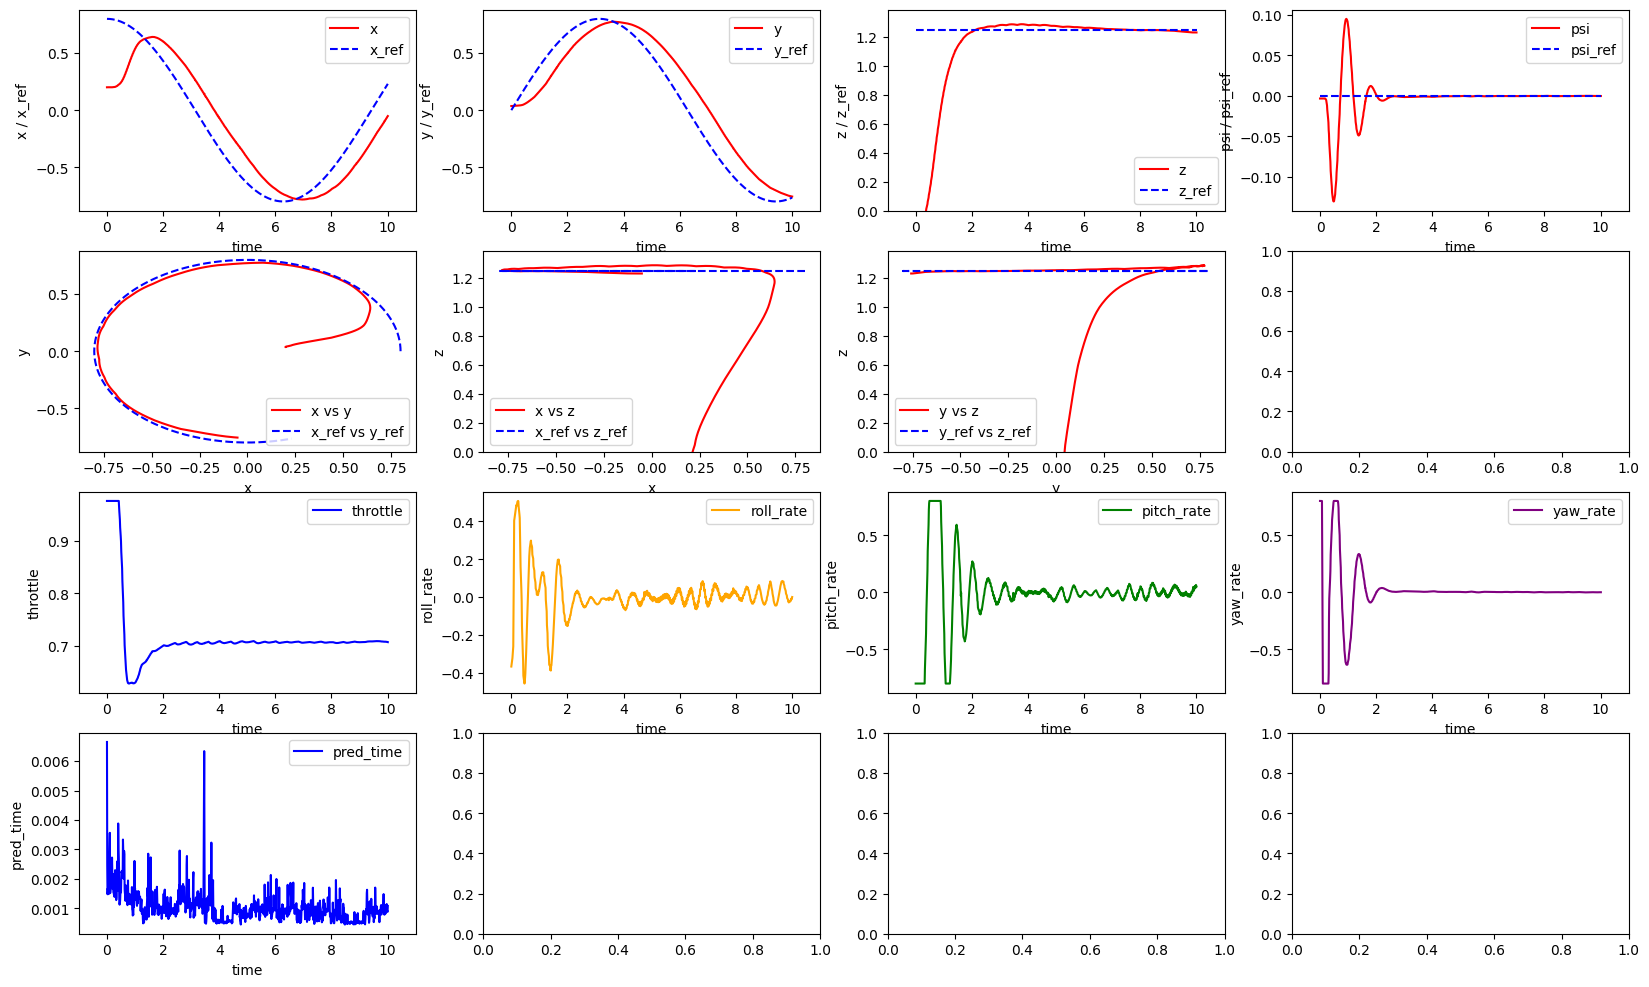

In [6]:
# Reuse the plotting function defined earlier for the uploaded .log data
plot_adjusted_avg_and_max_xyz_vs_reference(df_log)